# In this task we are going to perform a classification task.

# The data contains the exam 1 and exam 2 scores of the student, and if they are admitted or not.

# The task is to classify whether the student will be admitted or not based on the exam 1 and exam 2 score.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


Import the lbraries

In [5]:
# Your code to important Libraries - You need to import multiple libraries.
from scipy import optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the data and split it into X and y.

# X is the exam scores and y is the binary variable to determine if a student is admitted or not.



In [9]:
data = np.loadtxt("ex2data1.txt", delimiter=',')  # Note - The data is read using numpy rather than pandas.
X = data[:, [0, 1]]
y = data[:, 2]

# Print some samples of the input X

In [7]:
# Your code to print samples of X
X

NameError: ignored

# Print some samples of the output y

In [10]:
# Your code to print samples of y
y

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

# Plot the data

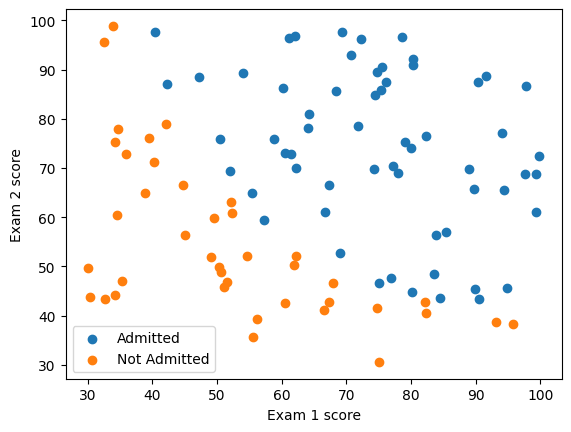

In [11]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not Admitted")

# Your code to plot all samples with target value 0
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

# Function for the Sigmoid

# $g(z) = \frac {1}{1 + e ^{-z}}$

In [12]:
def sigmoid(z):
  answer=1/(1+(np.exp(-z)))
  return answer

  # Your code to calculate the sigmoid values and then return it. Hint - np.exp()

# Plot the sigmod function.

# X axis will have numbers from -10 to 10 (could be any other range). Hint - You can use np.linespace or np.arange methods.

# y will have sigmoid function values.

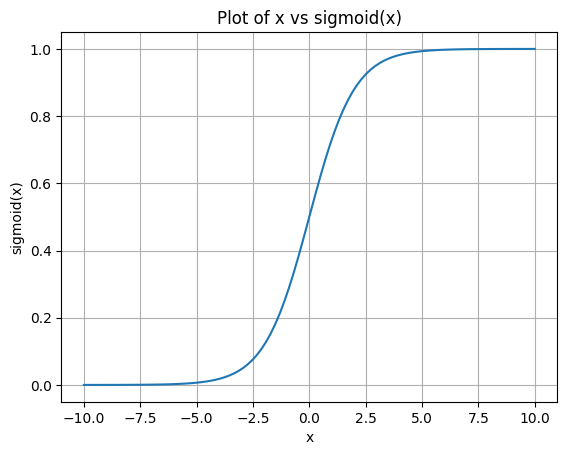

In [13]:
# Your code to plot x vs sigmoid (x) function. x is range from -10 to 10. y can be obtained by calling the function defined earlier
# Generate x values from -10 to 10
x = np.linspace(-10, 10, 100)

# Calculate y values using the sigmoid function
y = sigmoid(x)

# Plot x vs sigmoid(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Plot of x vs sigmoid(x)')
plt.grid(True)
plt.show()


# Define a function to calculate the cost.

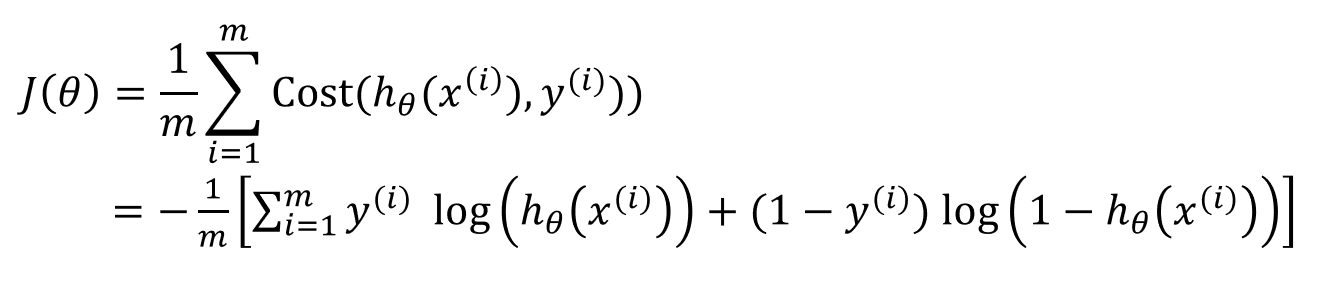

# Hint - Use the sigmoid function output, np.dot, and np.log functions.

In [14]:
def cost(theta, X, y):

    # Your code to calculate the cost based on inputs - theta, X, y. 2-3 lines of code.  Assign cost to the variable J and return it.
    m = len(y)  # Number of training examples




    # Calculate hypothesis
    h = sigmoid(np.dot(X, theta))

    # Calculate cost
    cost = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))

    return cost


# Define a function to calculate gradients of cost function with respect to the theta.

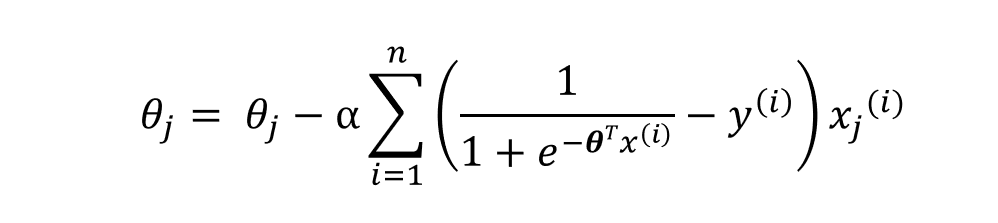

In [15]:
def gradient(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, h - y) / X.shape[0]
    return grad

# Combine everything together.

# This time we will use optimize function from scipy rather than writing gradient descent code from scratch

In [16]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0, 0])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y),
                        method='Newton-CG', jac=gradient)    # Note - Optimization method is Newton - CG rather that gradient descent. You can use other optimization methods too.
print(res.fun)  # 0.203
print(res.x)  # -25.161 0.206 0.201


0.6817671955157171
[-1.40432825  0.00603579  0.01523296]


# Plotting the decision boundary

In [19]:
def plotDecisionBoundary(theta, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))
    y_plot = np.dot(X_plot, theta).reshape(xx.shape)

    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not admitted")
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()
    plt.show()

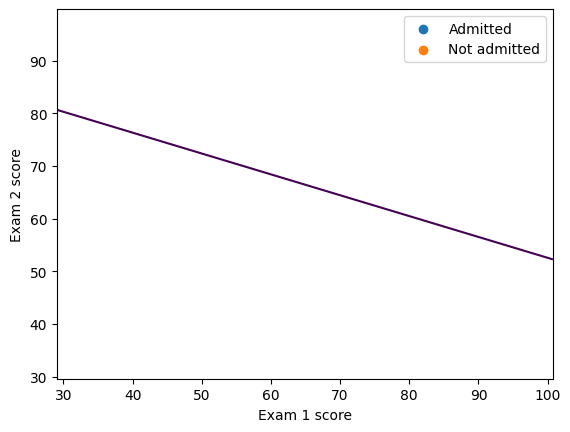

In [18]:
plotDecisionBoundary(res.x, X, y)


# Getting the output - Probabilities.

# What will be the output 1/0 for the following probability.

In [20]:
prob = sigmoid(np.dot(np.array([1, 45, 85]), res.x))
print(prob)  # 0.775 +/- 0.002

0.5404324539910299


In [21]:
\
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

def predict(theta, X):
    # Calculate probability using sigmoid function
    probability = sigmoid(np.dot(X, theta))

    # Get output 1/0 based on probability
    predictions = np.where(probability >= 0.5, 1, 0)

    return predictions

# Assuming you have X_test as your input data and theta as the updated parameter vector
# Make predictions
predictions = predict(theta, prob)

# Print the predictions
print(predictions)

[1 1 1]


#  Calculating accuracy - number of correct classification/total number of classification.

In [29]:

accuracy1=np.mean(predict(res.x, prob))
my_SID=2246942 #Khojiakbar Burkhonov
# Print the results
encrypted_value = accuracy1 * my_SID

print("Final Accuracy:", accuracy1)
print("Encrypted Value:", encrypted_value)

Final Accuracy: 0.6666666666666666
Encrypted Value: 1497961.3333333333


# **Important-** Document in your lab logbook, final accuracy and the  encrypted value of the accuracy obtained after after multiplying accuracy by your SID i.e. accuracy*SID.  

# **The rest of the notebook is optional. You are encouraged to complete it. But, if you have not, marks will not be deducted.**

# Using SKlearn library to perform logistic regression task.

##Let's used another dataset Social Network adds dataset - dataset contains some information about all of our users in the social network, including their User ID, Gender, Age, and Estimated Salary. The last column of the dataset is a vector of booleans describing whether or not each individual ended up clicking on the advertisement (0 = False, 1 = True).

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from matplotlib.colors import ListedColormap



# Splitting the data into training and test sets

In [31]:
# Your cose to split the data using sklearn train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)

Training set - X: (80, 2) y: (80,)
Testing set - X: (20, 2) y: (20,)


# Scaling the data - Converting everthing between 0-1

In [32]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Running Logistc Regression on training data -

# Remember - any kind of fit methiod  will be always used for the training data.

In [40]:
from sklearn.linear_model import LogisticRegression

# Assuming you have X_train as your training feature matrix and y_train as your training target variable

# Create an instance of the logistic regression classifier
classifier = LogisticRegression(random_state=0)

# Fit and transform the feature matrix
classifier.fit(X_train, y_train)

# Print the transformed feature matrix


ValueError: ignored

Making a prediction on the classifier.

# Making a prediction on the test set dataset.

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

AttributeError: ignored

# Getting the accuracy scores.

## Will study in detail in class.



In [ ]:
print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ",accuracy_score(y_test, y_pred)))

NameError: ignored

# Plotting the Confusion Matrix.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()


In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X, Y = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

probs = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contourf(X, Y, probs, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolor="white")

plt.title('Logistic Regression Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [ ]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X, Y = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

probs = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contourf(X, Y, probs, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolor="white")

plt.title('Logistic Regression Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()